#Библиотеки Python для DS (семинары)
##Урок 2. Практическая работа с данными. Применение корреляционного анализа
Используя датасет «World Happiness Report 2019», изучите взаимосвязи между различными факторами, которые влияют на уровень счастья в разных странах.

In [8]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import scipy.stats as stats

In [4]:
df = pd.read_csv('/content/world_happiness_report_2019.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


**Overall rank** - Общий рейтинг

**Country or region** - Страна или регион

**Score** - Оценка

**GDP per capita** - ВВП на душу населения

**Social support** - Социальная поодержка

**Healthy life expectancy** - Ожидаемая продолжительность здоровой жизни

**Freedom to make life choices** - Свобода делать жизненный выбор

**Generosity** - Щедрость

**Perceptions of corruption** - Восприятие коррупции

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


В датафрейме содержится 156 измерений по 7 параметрам. Нет пропущенных значений.

In [6]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


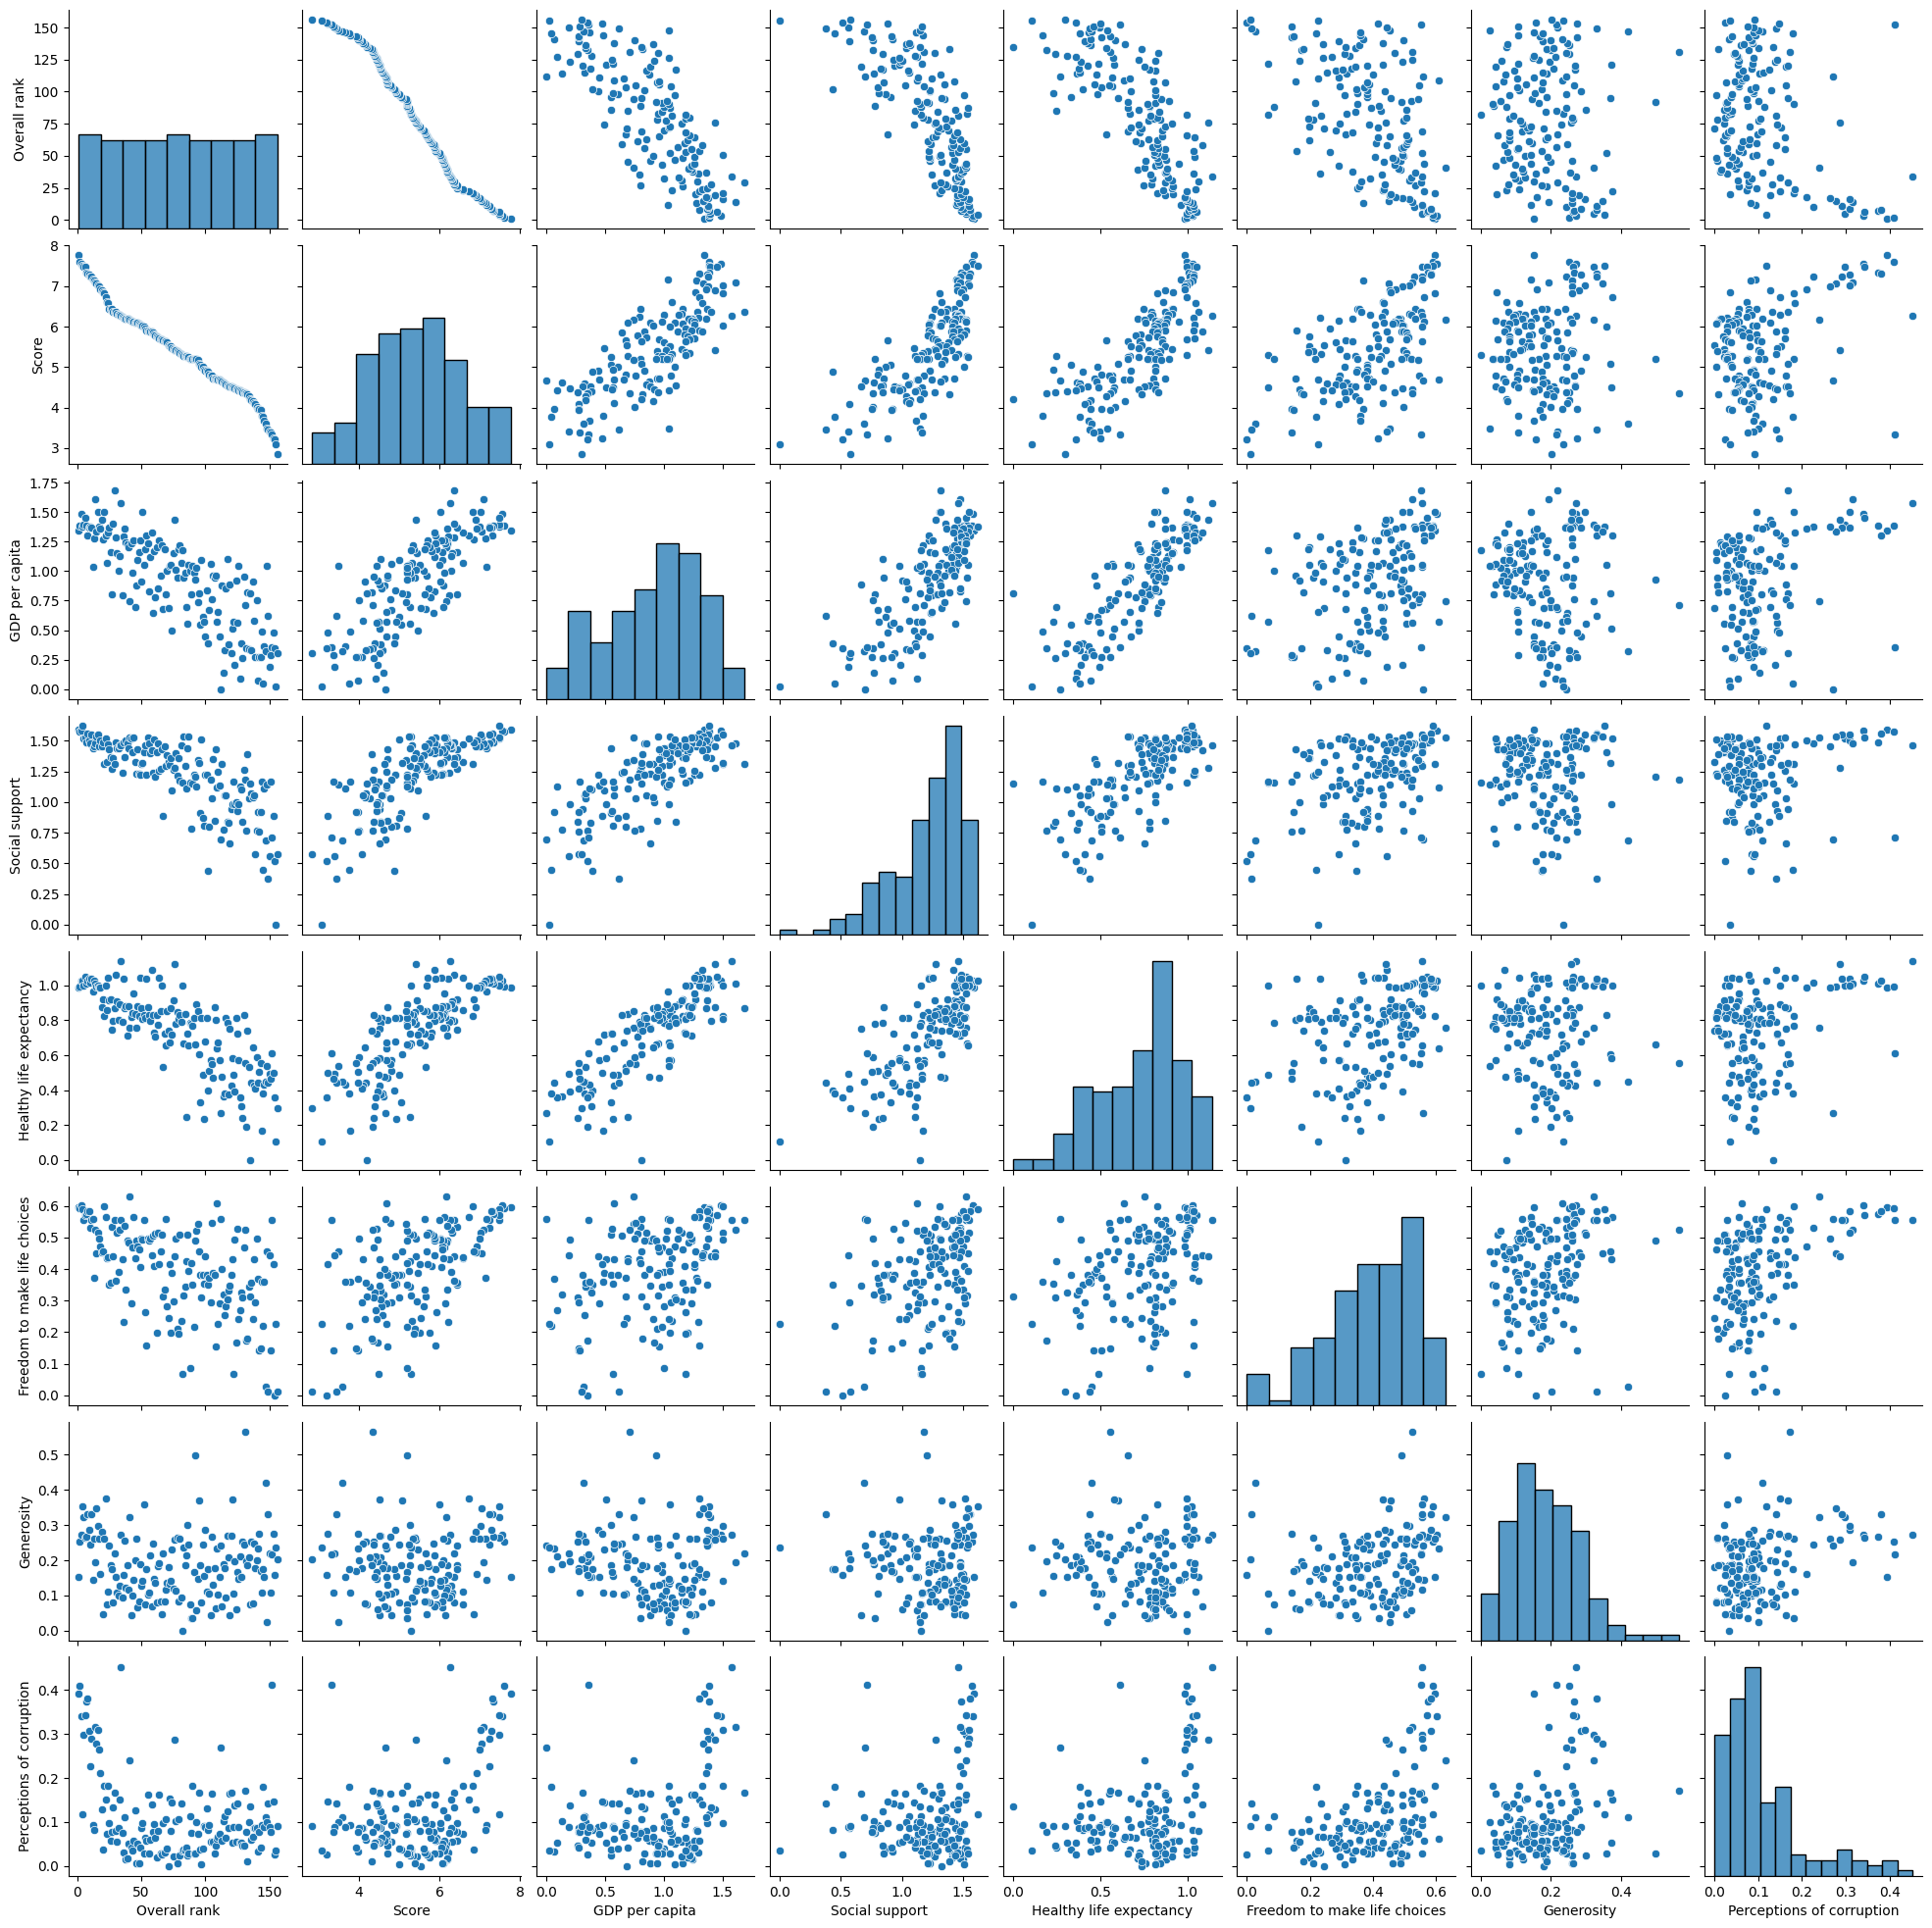

In [7]:
sns.pairplot(df)

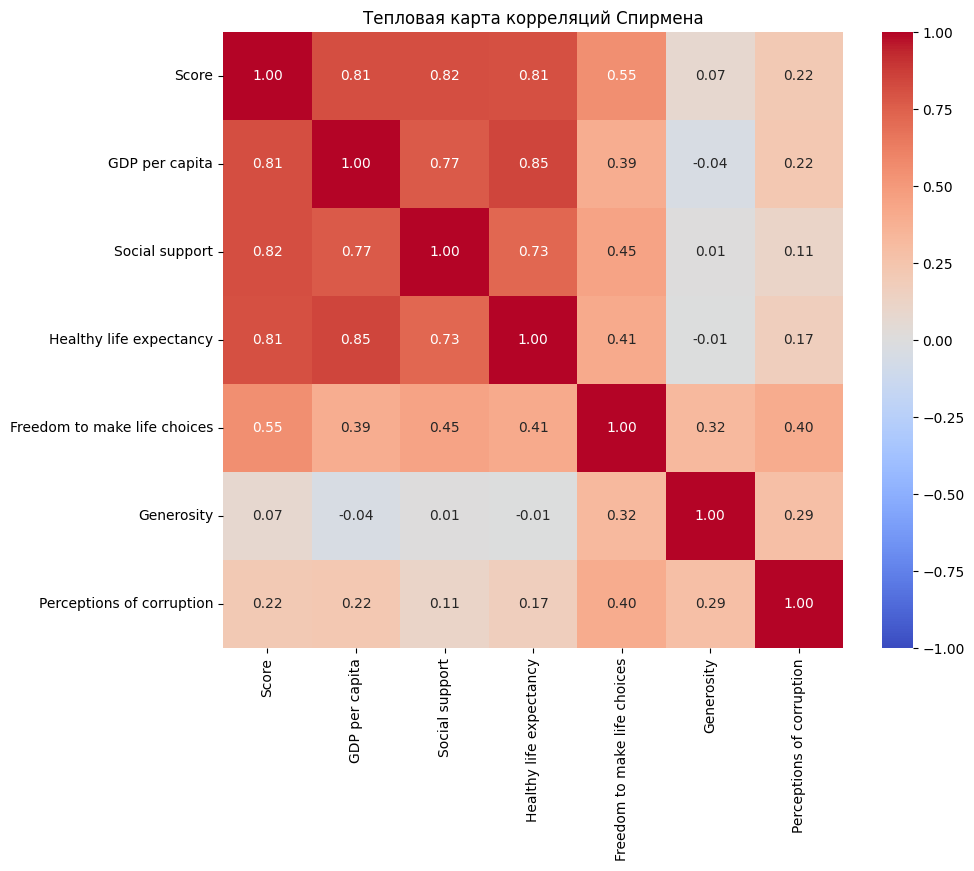

In [74]:
# Выборка количественных переменных
quantitative_vars = df[['Score','GDP per capita', 'Social support', 'Healthy life expectancy',	'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
correlation_matrix = quantitative_vars.corr(method='spearman')  # Вычисляем матрицу корреляций Спирмена

# Тепловая карта корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Тепловая карта корреляций Спирмена')
plt.show()

###Задание 1: Анализ корреляции между ВВП на душу населения и оценкой счастья.
Используйте коэффициент Пирсона для определения взаимосвязи между ВВП на душу населения и оценками счастья.

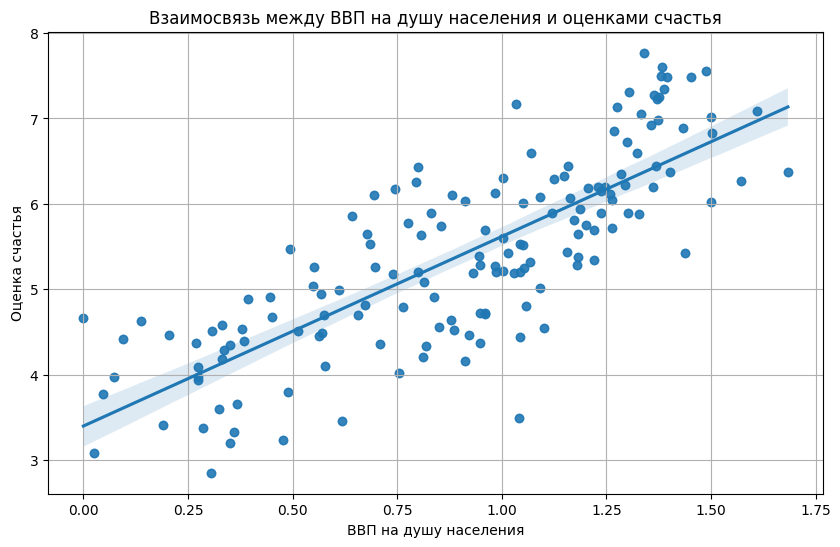

In [61]:


# Построение графика рассеивания
plt.figure(figsize=(10, 6))
plt.scatter(df['GDP per capita'], df['Score'], alpha=0.5)
sns.regplot(x=df['GDP per capita'], y=df['Score'])
plt.title('Взаимосвязь между ВВП на душу населения и оценками счастья')
plt.xlabel('ВВП на душу населения')
plt.ylabel('Оценка счастья')
plt.grid(True)
plt.show()


In [10]:
# Вычисляем коэффициент корреляции Пирсона
correlation_coefficient, p_value = stats.pearsonr(df['GDP per capita'], df['Score'])

print(f"Коэффициент корреляции Пирсона: {correlation_coefficient}")
print(f"P-значение: {p_value}")

Коэффициент корреляции Пирсона: 0.7938828678781275
P-значение: 4.315480913319406e-35


**Вывод:**

На основе коэффициента корреляции Пирсона и низкого P-значения можно сказать, что существует сильная положительная связь между сойиальнй поддержкой и уровнем счастья.

Чем выше уровень ВВП на душу населения, тем счастливее люди себя чувствуют.

###Задание 2: Исследование влияния социальной поддержки на оценку счастья.
Примените коэффициент Спирмена для анализа отношений между социальной поддержкой и оценками счастья.


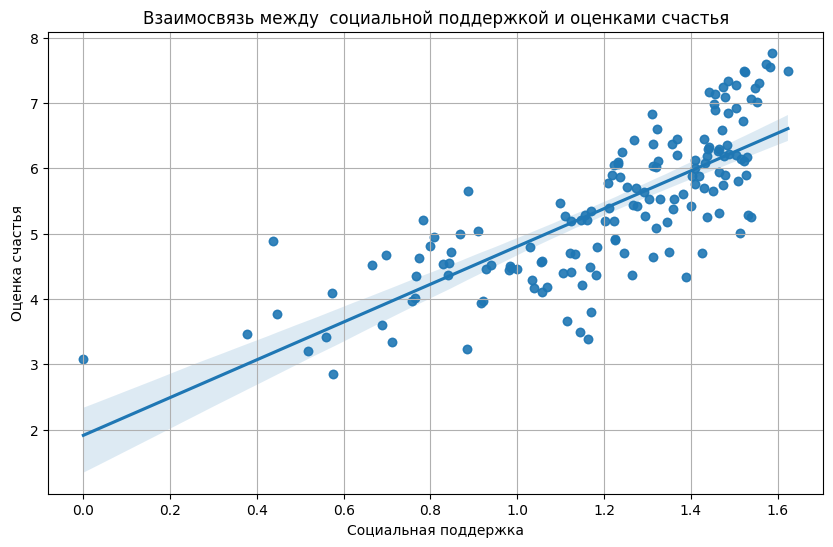

In [67]:
# Построение графика рассеивания
plt.figure(figsize=(10, 6))
plt.scatter(df['Social support'], df['Score'], alpha=0.5)

sns.regplot(x=df['Social support'], y=df['Score'])

plt.title('Взаимосвязь между  социальной поддержкой и оценками счастья')
plt.xlabel('Cоциальная поддержка')
plt.ylabel('Оценка счастья')
plt.grid(True)
plt.show()

In [72]:
# Вычисляем коэффициент корреляции Спирмена
correlation_coefficient, p_value = stats.spearmanr(df['Social support'], df['Score'])

print(f"Коэффициент корреляции Спирмена: {correlation_coefficient}")
print(f"P-значение: {p_value}")

Коэффициент корреляции Спирмена: 0.8161807357057258
P-значение: 1.613098226311642e-38


**Вывод:**

На основе коэффициента корреляции Спирмена и низкого P-значения можно сказать, что существует сильная положительная связь между сойиальнй поддержкой и уровнем счастья.

Чем выше уровень социальной поддержки, тем счастливее люди себя чувствуют.

###Задание 3: Взаимосвязь между продолжительностью здоровой жизни и оценками счастья.
Используйте коэффициент корреляции Кэнделла для изучения связи между ожидаемой продолжительностью здоровой жизни и уровнем счастья.


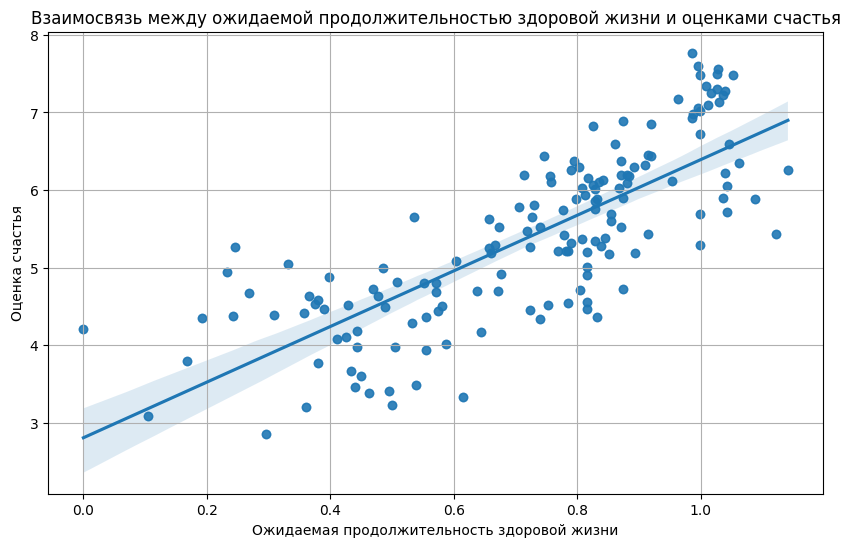

In [68]:
# Построение графика рассеивания
plt.figure(figsize=(10, 6))
plt.scatter(df['Healthy life expectancy'], df['Score'], alpha=0.5)

sns.regplot(x=df['Healthy life expectancy'], y=df['Score'])

plt.title('Взаимосвязь между ожидаемой продолжительностью здоровой жизни и оценками счастья')
plt.xlabel('Ожидаемая продолжительность здоровой жизни')
plt.ylabel('Оценка счастья')
plt.grid(True)
plt.show()

In [64]:
# Вычисляем коэффициент корреляции Кэнделла
correlation_coefficient, p_value = stats.kendalltau(df['Healthy life expectancy'], df['Score'])

print(f"Коэффициент корреляции Кэнделла: {correlation_coefficient}")
print(f"P-значение: {p_value}")


Коэффициент корреляции Кэнделла: 0.6026128531700047
P-значение: 8.000780684230196e-29


**Выводы:**

На основе коэффициента корреляции Кендалла и низкого P-значения можно сделать вывод о наличии умеренной положительной связи между ожидаемой продолжительностью здоровой жизни и уровнем счастья. Увеличение ожидаемой продолжительности здоровой жизни может сопровождаться увеличением уровня счастья, и эта связь является статистически значимой.

###Задание 4: Свобода делать жизненный выбор и уровень счастья.
Проанализируйте, используя коэффициент корреляции Пирсона, как свобода делать жизненный выбор влияет на уровень счастья.

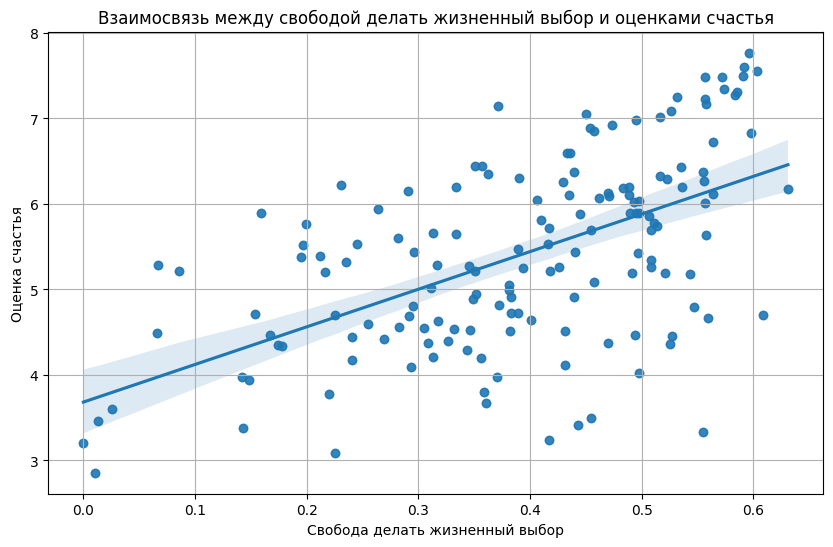

In [71]:
# Построение графика рассеивания
plt.figure(figsize=(10, 6))
plt.scatter(df['Freedom to make life choices'], df['Score'], alpha=0.5)

sns.regplot(x=df['Freedom to make life choices'], y=df['Score'])

plt.title('Взаимосвязь между свободой делать жизненный выбор и оценками счастья')
plt.xlabel('Свобода делать жизненный выбор')
plt.ylabel('Оценка счастья')
plt.grid(True)
plt.show()

In [69]:
# Вычисляем коэффициент корреляции Пирсона
correlation_coefficient, p_value = stats.pearsonr(df['Freedom to make life choices'], df['Score'])

print(f"Коэффициент корреляции Пирсона: {correlation_coefficient}")
print(f"P-значение: {p_value}")

Коэффициент корреляции Пирсона: 0.5667418257199902
P-значение: 1.23792436279821e-14


Исходя из коэффициента корреляции Пирсона, который равен 0.5667, и низкого P-значения, которое меньше уровня значимости 0.05, можно сделать следующие выводы:

Положительная связь: Коэффициент корреляции Пирсона положительный (0.5667), что указывает на наличие положительной линейной связи между свободой делать жизненный выбор и уровнем счастья. Это означает, что при увеличении свободы делать выборы, уровень счастья имеет тенденцию к увеличению.

Статистическая значимость: Низкое P-значение (1.23792436279821e-14) ниже уровня значимости 0.05, что говорит о статистической значимости полученной корреляции. Это означает, что вероятность получить такую корреляцию случайно очень низка, что подтверждает статистическую достоверность полученных результатов.

###Вопросы для обсуждения:


####Какой из факторов наиболее сильно связан с уровнем счастья в анализируемых странах?

Исходя из значений корреляции, самыми значимыми параметрами влияющими на итоговую оценку уровня счасться являются ВВП на душу населения, социальная поддержка и продолжительностиь жизни.

 #### В чем может заключаться причина такой взаимосвязи?

Значимость этих параметров может быть объяснена следующим образом:

1. ВВП на душу населения: Высокий уровень ВВП на душу населения может способствовать общему благополучию и доступности ресурсов для людей. Экономическая процветание может обеспечить лучшие условия жизни, доступ к образованию, здравоохранению и другим жизненно важным услугам, что в свою очередь может повысить уровень счастья.

2. Социальная поддержка: Наличие развитой системы социальной поддержки может оказывать позитивное влияние на уровень счастья людей. Поддержка со стороны государства и общества, включая социальные программы, медицинское обслуживание, образование и психологическую помощь, способствует улучшению качества жизни и благополучию населения.

3. Продолжительность жизни: Высокий уровень продолжительности жизни свидетельствует о качественной медицинской помощи, заботе о здоровье населения и общем благополучии общества. Увеличение продолжительности жизни может повлиять не только на физическое, но и на психологическое самочувствие людей, что может способствовать повышению уровня счастья.

Таким образом, связь между ВВП на душу населения, социальной поддержкой, продолжительностью жизни и уровнем счастья может быть связана с обеспечением людей необходимыми ресурсами, услугами и поддержкой, которые способствуют повышению качества жизни и благополучия общества в целом.